# CNN model for operator and operand classification

In [ ]:
%autosave 30

In [1]:
import random
import numpy as np
import pickle
import os
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPool2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
import pandas as pd

## Preparing dataset

The true labels are declared.

In [2]:
true_labels = ['0','1','2','3','4','5','6','7','8','9','+','-','*','/','(',')','^']

Images are loaded and coupled with their labels.

In [3]:
data = []
p='Dataset/dataset'

for label in os.listdir(p):
    img = os.path.join(p,label)

    for image in os.listdir(img):
        path = os.path.join(img, image)

        pic = cv2.imread(path, 0)

        if label=='X':
            data.append([pic, true_labels.index('*')])
        elif label=='div':
            data.append([pic, true_labels.index('/')])
        else:
            data.append([pic, true_labels.index(label)])

In [4]:
len(data)

120628

The image-label pairs are shuffled to remove bias.

In [5]:
random.shuffle(data)

The images and labels are divided into 2 different Lists.

In [6]:
X = []
y = []
for img, lbl in data:
    X.append(img)
    y.append(lbl)

Print a sample.

1
(64, 64)


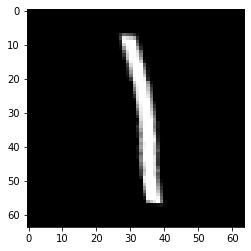

In [10]:
i=1
print(true_labels[y[i]])
print(X[i].shape)
plt.imshow(X[i], 'gray')

Resize the image into a 4D tensor.
Normalise the image pixel values between 0 and 1.

In [11]:
X=np.array(X)
y=np.array(y)

X = X.reshape(-1, 64, 64, 1)
X = X / 255
# print(X)

In [12]:
np.save("Data/data_170322_rm.npy", X)
np.save("Data/labels_170322_rm.npy", y)

In [13]:
len(X)

120628

## Model creation

Set input size and no. of classes.

In [14]:
num_classes = len(true_labels)
input_shape=X[0].shape

print(num_classes, input_shape)

17 (64, 64, 1)


Create a CNN model using Sequential class of keras.

In [15]:
model=Sequential()

model.add(Conv2D(32, (5,5), activation="relu",input_shape=input_shape, strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), strides=(2,2), padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation="relu", strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1), padding='same'))

model.add(Conv2D(64, (3,3), activation="relu", strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1), padding='same'))

model.add(Conv2D(64, (3,3), activation="relu", strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation="relu", strides=(1, 1), padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation="relu", strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

Model summary.

In [16]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
#               metrics=['accuracy'])

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

Set model training parameters.

In [17]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True,
)

In [18]:
batch_size = 64
epochs = 30

Split the dataset into 70% train and 30% test data. Train the model and store the training history.

In [19]:
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.3, callbacks=[early_stopping])
# history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.3)

print("The model has successfully trained")

Epoch 1/30
1320/1320 [==============================] - 630s 477ms/step - loss: 0.2604 - accuracy: 0.9174 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 2/30
1320/1320 [==============================] - 541s 410ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 3/30
1320/1320 [==============================] - 541s 410ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0248 - val_accuracy: 0.9915
Epoch 4/30
1320/1320 [==============================] - 544s 412ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0196 - val_accuracy: 0.9934
Epoch 5/30
1320/1320 [==============================] - 526s 399ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0108 - val_accuracy: 0.9964
Epoch 6/30
1320/1320 [==============================] - 541s 410ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0148 - val_accuracy: 0.9952
Epoch 7/30
1320/1320 [==============================] - 542s 410ms/step - loss: 0.0199 - accuracy: 0.9939 - val_

Access and display validation loss and accuracy.

Minimum validation loss: 0.010760299861431122


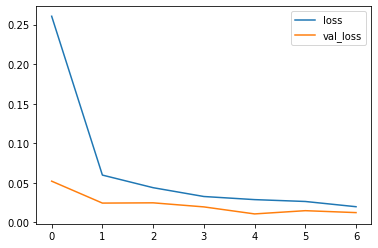

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history_df.columns

Maximum validation accuracy: 0.9964354038238525


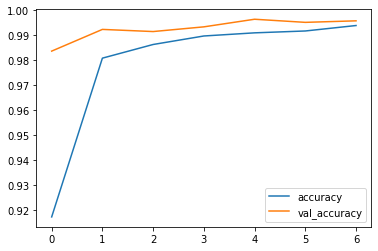

In [21]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

Save the model.

In [22]:
model.save('models/model_170322_64b_rm.h5')

In [74]:
i=0

Test the model.

0.66603684 

[2.48169999e-06 1.07537846e-04 2.91491205e-07 6.66036844e-01
 1.80807888e-06 8.80044317e-05 1.85264355e-07 8.72661769e-02
 6.79656514e-05 4.18893658e-02 1.86283430e-07 6.11948181e-08
 3.58695587e-07 7.18814647e-07 8.12655987e-09 2.04532474e-01
 5.55995621e-06] 

3


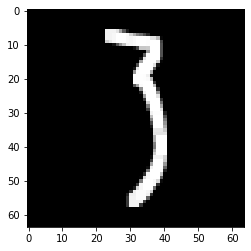

In [75]:
img = cv2.imread(f"C:/Users/rhita/Documents/GitHub/picture-calculator/images/ROI_{i}.png",0)
plt.imshow(img, "gray")
img=img.reshape(-1,64,64,1)
img = img/255

predict = model.predict(img)

print( predict[0].max(), '\n' )
print( predict[0], '\n' )
print( true_labels[ np.argmax(predict[0])])

i+=1

Load saved model and print summary.

In [1]:
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

model = load_model("models/model_170322_64b_rm.h5")

# model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001),
            #   metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1